In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
from describe import loadData, trainDataFilePath

data = loadData(trainDataFilePath())
if data is None:
    exit(1)

# Remove index from data, as it's not a usefull feature
df = data.drop(columns=['Index', 'index'], errors='ignore')

> **Scatter Plot :** What are the two features that are similar ?

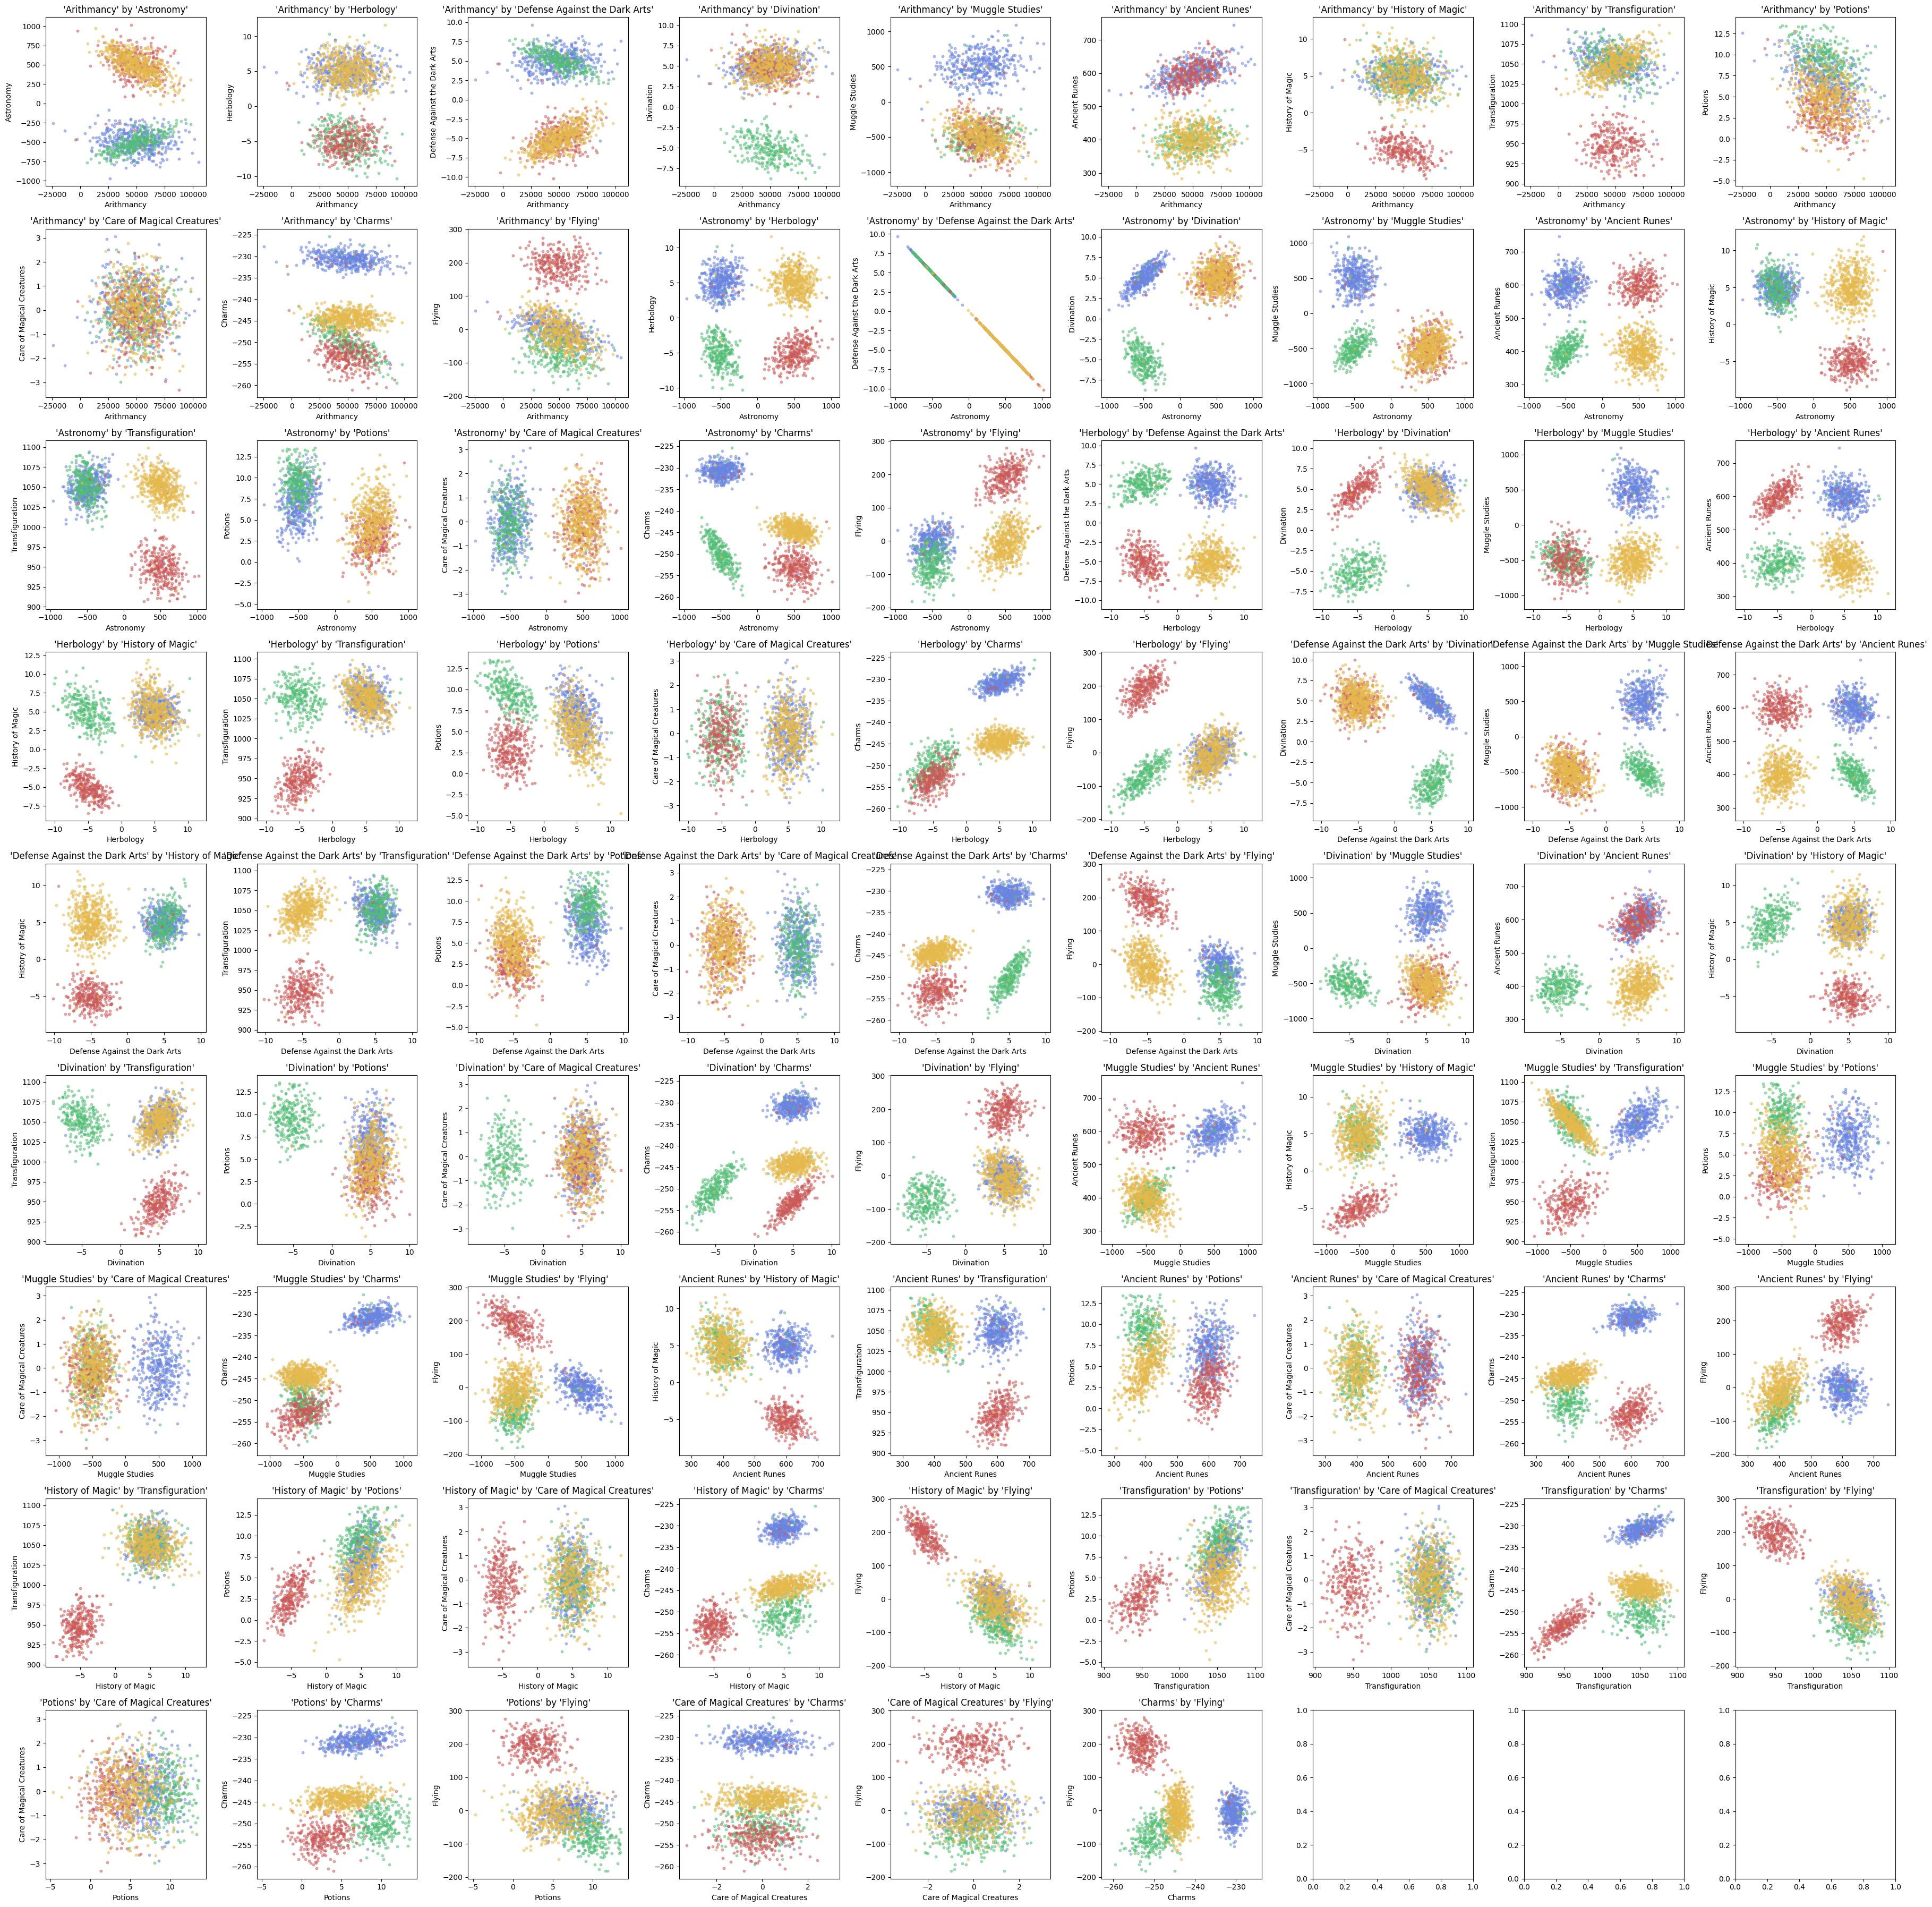

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
all_houses = df["Hogwarts House"].dropna().unique()

house_color_map = {
    'Gryffindor': "#CB5959",
    'Hufflepuff': "#E5B94C",
    'Ravenclaw':  '#6A85DF',
    'Slytherin':  "#52BE76"
}

feature_pairs = list(itertools.combinations(numeric_cols, 2))

num_plots = len(feature_pairs)
cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(cols, rows, figsize=(cols*4, rows*4), squeeze=True)

i = 0
for x_feature, y_feature in feature_pairs:
    ax = axes[i // cols][i % cols]
    i += 1
    for house in all_houses:
        house_bool_maks = df["Hogwarts House"] == house
        x = df[house_bool_maks][x_feature]
        y = df[house_bool_maks][y_feature]
        ax.scatter(x, y, s=10, alpha=0.5, c=house_color_map[house])
    ax.set_title(f"'{x_feature}' by '{y_feature}'")
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)

plt.tight_layout()
plt.show()